Salim Chemlal Wed Sep 28 2016 11:10:36 

CPython 2.7.11
IPython 4.1.2
                 Date  mg/dL CHO (g)
1 2008-07-24 16:56:00    NaN     NaN
2 2008-07-24 17:01:00    NaN     NaN
3 2008-07-24 17:06:00    NaN     NaN
4 2008-07-24 17:11:00    NaN     NaN
5 2008-07-24 17:16:00    NaN     NaN

 Data Types:
Date       datetime64[ns]
mg/dL             float64
CHO (g)            object
dtype: object

Total number of glucose readings is: 7646

Note: Some of the readings may be missing, the above number represents the size of collected readings from start to end date

Remove NaN from the mg/dL column...

Total actual number of glucose readings is: 1982


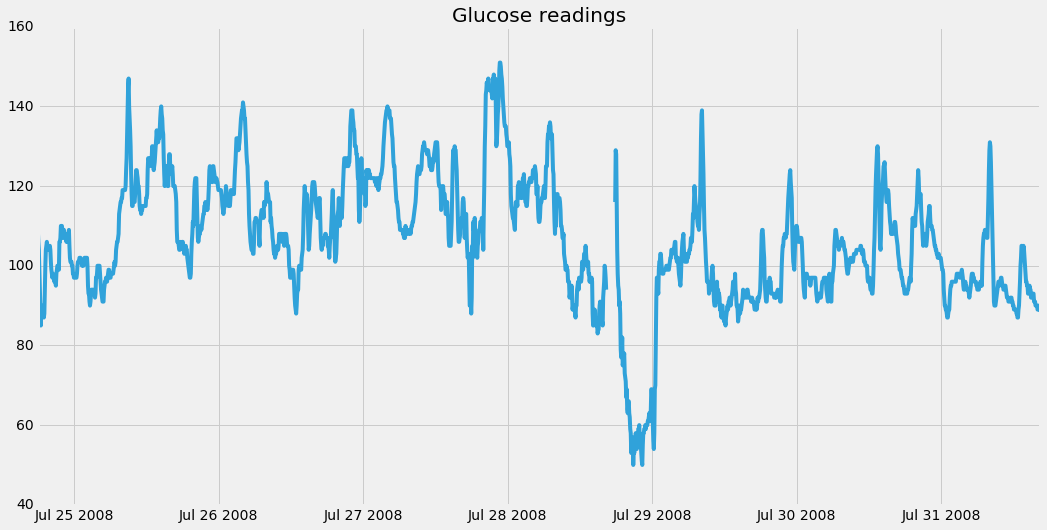

In [140]:
#An IPython magic extension for printing date and time stamps, version numbers, and hardware information. 
#%load_ext watermark 
%watermark -a "Salim Chemlal" -n -t -v 
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime, date, time
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
#This is graph line style, from Nate silver
plt.style.use('fivethirtyeight')

_DATA_DIR = r'C:\Users\engadmin\Desktop\Diabetes  Project Code\Input\input'
_FIG_DIR = r'C:\Users\engadmin\Desktop\Diabetes  Project Code\figures'

if not os.path.exists(_FIG_DIR):
    os.makedirs(_FIG_DIR)
    
_GULCOSE_DATA_PATH = os.path.join(_DATA_DIR, 'P3.csv')
fields = ["Date", "mg/dL", "CHO (g)"]
df = pd.read_csv(_GULCOSE_DATA_PATH, parse_dates=['Date'], usecols = fields) #read and prase Date col as dataTimes object
df = df.sort(['Date'])
print df.head()
print '\n Data Types:'
print df.dtypes

## Matplotlib Variables
_FIG_SIZE = (16, 8)
_FIG_FORMAT = 'png'
_FIG_DPI = 200

def _file_format(string_):
    string_ = string_.replace('-', '_').replace(' ', '_').replace('$', '')
    string_ += '.' + _FIG_FORMAT
    return string_

_BEGINNING_DATE = date(2008, 6, 30)
#change title to include date of first index and last index
#title = 'Glucose readings for P1 between {} - 2008-07-27'.format(_BEGINNING_DATE)
title = 'Glucose readings'
fig_path = os.path.join(_FIG_DIR, _file_format(title))
plt.figure(figsize=_FIG_SIZE)
plt.plot_date(df.Date, df['mg/dL'], '-')
plt.title(title)
plt.savefig(fig_path, dpi=_FIG_DPI)
print "\nTotal number of glucose readings is:", df['mg/dL'].size
print "\nNote: Some of the readings may be missing, the above number represents the size of collected readings from start to end date"
#Removing NaN from a specific column of the dataframe, here it's mg/dL
df_wonan_mg = df.dropna(subset=['mg/dL'])
print "\nRemove NaN from the mg/dL column..."
print "\nTotal actual number of glucose readings is:", df_wonan_mg['mg/dL'].size

In [141]:
#Converting object type to float for all of the dataframe
df2= pd.DataFrame(df).convert_objects(convert_numeric=True)
print df2.dtypes
print "\nRemove NaN from the CHO so we can plot the points of meals..."
#Removing NaN from a specific column of the dataframe, here it's CHO. isfinite can work for series, but not for dataframe
df2 = df2.dropna(subset=['CHO (g)'])
print "\n", df2.head()
print "\nTotal number of meal times:", df2['CHO (g)'].size
print "\nNote: Some of the meal times do not have corresponding glucose reading, as it was not recorded at that time"
#Removing NaN from a specific column of the dataframe, here it's mg/dL
df2_wonan_mg = df2.dropna(subset=['mg/dL'])
print "\nthus, total actual number of meal times with glucose readings is:", df2_wonan_mg['mg/dL'].size
print "\nNote: Some of the meal times are recorded of the same meal and stand for only one meal"

Date       datetime64[ns]
mg/dL             float64
CHO (g)           float64
dtype: object

Remove NaN from the CHO so we can plot the points of meals...

                  Date  mg/dL  CHO (g)
26 2008-07-24 19:01:00   88.0    0.576
27 2008-07-24 19:06:00   94.0    0.576
28 2008-07-24 19:11:00  100.0    0.576
29 2008-07-24 19:16:00  104.0    0.576
30 2008-07-24 19:21:00  105.0    0.576

Total number of meal times: 70

Note: Some of the meal times do not have corresponding glucose reading, as it was not recorded at that time

thus, total actual number of meal times with glucose readings is: 70

Note: Some of the meal times are recorded of the same meal and stand for only one meal


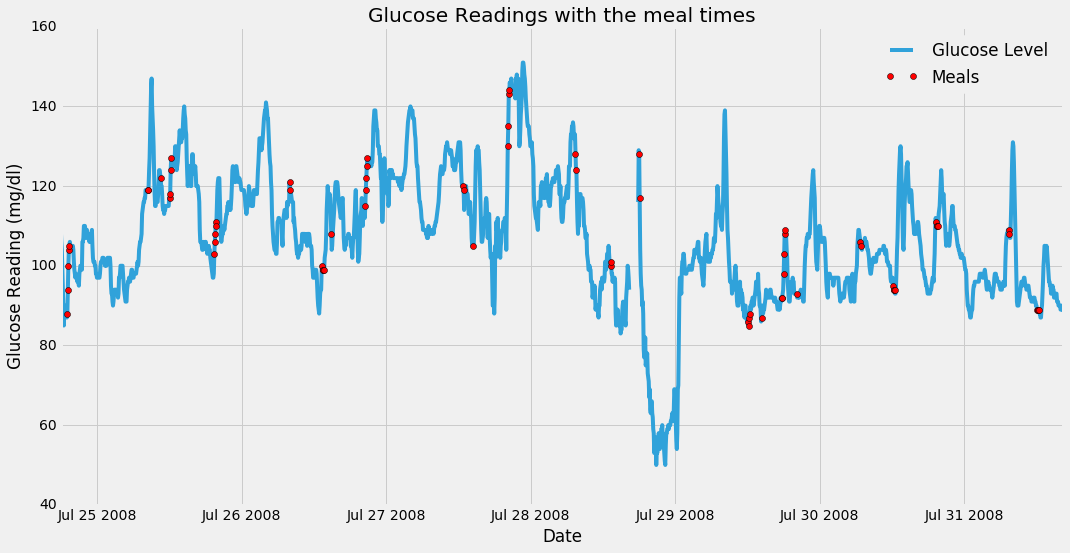

In [142]:
#Comment the below block if want to use full data set
# _START_DATE = date(2008,7,10)
# _END_DATE = date(2008,7,12)
# print "Remove the first data before:", _START_DATE 
# df = df[df.Date > _START_DATE]
# df2 = df2[df2.Date > _START_DATE]

# print "Remove the end data after:", _END_DATE 
# df = df[df.Date < _END_DATE ]
# df2 = df2[df2.Date < _END_DATE ]
#####

plt.figure(figsize=_FIG_SIZE)
plt.plot_date(df.Date, df['mg/dL'], '-', label="Glucose Level");
plt.plot_date(df2.Date, df2['mg/dL'], 'ro', label="Meals")
plt.xlabel('Date')
plt.ylabel('Glucose Reading (mg/dl)')
plt.legend(loc='upper right')
plt.title('Glucose Readings with the meal times');

There are 70 recorded glucose readings while eating but some are redundant and some do not have corresponding glucose readings

                 Date  mg/dL  CHO (g)
0 2008-07-24 19:01:00   88.0    0.576
1 2008-07-24 19:06:00   94.0    0.576
2 2008-07-24 19:11:00  100.0    0.576
3 2008-07-24 19:16:00  104.0    0.576
4 2008-07-24 19:21:00  105.0    0.576

Remove redundant readings of same meal (index/Reading)...

There are 25  unredundant recorded glucose readings while eating

                 Date  mg/dL  CHO (g)
0 2008-07-24 19:01:00   88.0    0.576
1 2008-07-25 08:21:00  119.0   47.375
2 2008-07-25 10:31:00  122.0  149.210
3 2008-07-25 12:01:00  117.0    6.415
4 2008-07-25 19:26:00  103.0    0.200

Total meal times with glucose readings and meal size are 25


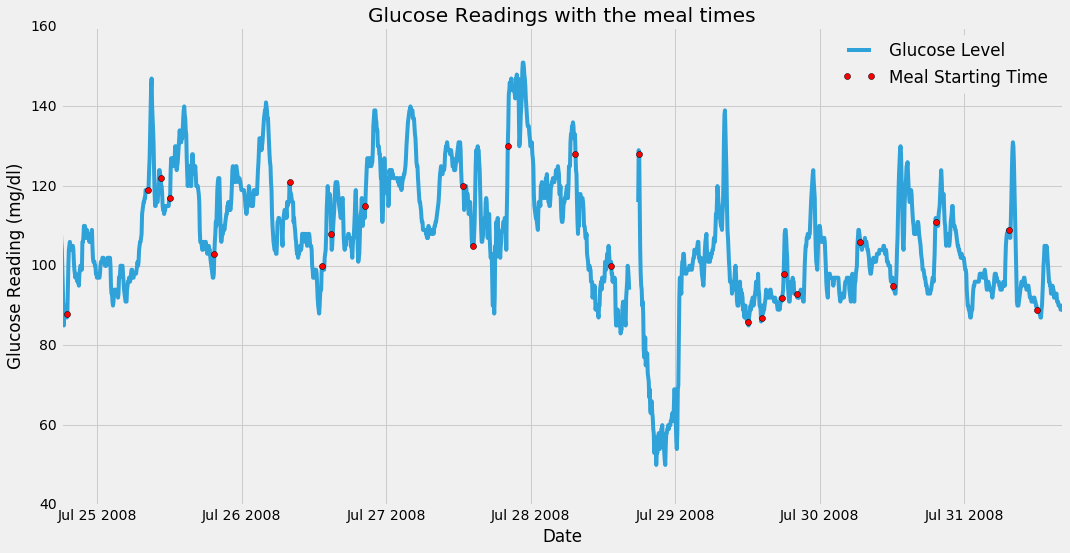

In [143]:
#Remove redundant CHO readings 
s_CHO = pd.Series(df2['CHO (g)'])
#Number of meal CHO Recordings
print "There are", s_CHO.size, "recorded glucose readings while eating but some are redundant and some do not have corresponding glucose readings\n"

#resetting dataframe index
df3 = df2.reset_index(drop=True)
#print df3.head()

df4 = pd.DataFrame(df3)   
print df4.head()

print '\nRemove redundant readings of same meal (index/Reading)...\n' 
row = 0
for i, x in enumerate(df3['CHO (g)']):
        #print i, x
        if i > 0:
            row = row + 1
            #if content of current element is same as previous, then delete row      
            #resetting dataframe index
            df3 = df2.reset_index(drop=True)
            if x == df3['CHO (g)'][i-1]:
                #print '\nRemove redudant readings rows', i, x
                #drop ith row
                df4.drop(df4.index[row], axis=0, inplace=True)
                row = row - 1

#resetting dataframe index (1,2,3...)
df4 = df4.reset_index(drop=True)
print "There are", df4['CHO (g)'].size, " unredundant recorded glucose readings while eating\n"

print df4.head()
#print df4

#reindexing the dataframe with the Date column-- This will remove Date column but that is needed for graphing
#df4 = df4.set_index('Date')

plt.figure(figsize=_FIG_SIZE)
plt.plot_date(df.Date, df['mg/dL'], '-', label="Glucose Level");
plt.plot_date(df4.Date, df4['mg/dL'], 'ro', label="Meal Starting Time")
plt.xlabel('Date')
plt.ylabel('Glucose Reading (mg/dl)')
plt.legend(loc='upper right')
plt.title('Glucose Readings with the meal times');

#There are many meal times but without glucose readings, unfortunetly these are not useful for the moment and need to be removed
df4 = df4.dropna(subset=['mg/dL'])
print "\nTotal meal times with glucose readings and meal size are", df4['mg/dL'].size
#resetting dataframe index (1,2,3...)
df4 = df4.reset_index(drop=True)

In [144]:
print "The current meal times are:\n", df4.head()
y = []
z = []
w = []
print "\nAdjusting meal time to the smallest glucose reading within 20mins of recording"
print "since it may takes few minutes for glucose to increase after food intake...\n"
update = 0
for i, x in enumerate(df4['Date']):
    #print x   
    #Finding index of the meal starting time in the original dataset to compare to previous readings
    #This is because glucose does not increase instantly after meal, it takes few minutes
    #We pick the lowest reading within a range of 20mins before starting of meal time, and make that meal time
    meal_index = df[df['Date'] == x].index[0] 
    #print meal_index
    original_meal_glucose = df['mg/dL'][meal_index]
    meal_glucose = df['mg/dL'][meal_index]
    #The value inside the range represents minutes, 2=>5mins, 3=>10mins, 4=>15mins, and so forth
    #5 is for picking the lowest glucose value within last 20mins, index 5 is for 20mins
    for j in range(5):
        if np.isnan(df['mg/dL'][meal_index - j]):      
            break
        elif meal_glucose > df['mg/dL'][meal_index - j]:
            meal_glucose = df['mg/dL'][meal_index - j]
            new_index = meal_index - j
            #print "New index is", meal_index - j
                    
    if df['mg/dL'][meal_index] != meal_glucose:
        update = update + 1
        #we also need to update that row
        #y array will contain the rows from df4 that should be updated, so they will be dropped
        #y.extend([df4['Date'].index[i]]) -- or simply below
        y.extend([i])
        #w array will contain the CHO values of the rows to be later replaced
        w.extend(["%.2f" %df4.at[i, 'CHO (g)']])
        #z array contains the rows to be added
        z.extend([new_index])

#Let's copy df4 into a different dataframe that we will modify, if we ever want to use dataframe without adjusted meal times, it's df4        
df5 = pd.DataFrame(df4)

#Considering the above assumption, several meal times will be adjusted
print "Out of the", df4['Date'].size, "meal times," , update, "are to be adjusted" 

#Dropping the rows to be adjusted
print "\nFollowing are the rows to be updated:", y, "\n"
df5.drop(df5.index[y],axis=0,inplace=True)

#print "Following are the indexes of new rows from original dataframe:"
#print  z, "\n"
#print  w, "\n"

#Adding the adjusted new rows, we must also update CHO as it may be nan for previous values so we will copy it to replace nan

#Either this logic or the one used below -- talking about the next two lines of code
#for k in range(len(z)):
    #df5 = df5.append(df.loc[z[k]])
for i, k in enumerate(z):
    df5 = df5.append(df.loc[k])
    #replace the CHO (g) of the rows adjusted by the original meal time because they will have nan otherwise  
    df5.loc[k, 'CHO (g)'] = df4['CHO (g)'].iloc[y[i]]

print "The updated meal times are:\n"
    
df5 = df5.sort(['Date'])
df5 = df5.reset_index(drop=True)
#result = df5.loc[5073, 'CHO (g)'] 
# print "\nThe new list of glucose recordings with meal sizes is:"
#print result
print df5.head()

The current meal times are:
                 Date  mg/dL  CHO (g)
0 2008-07-24 19:01:00   88.0    0.576
1 2008-07-25 08:21:00  119.0   47.375
2 2008-07-25 10:31:00  122.0  149.210
3 2008-07-25 12:01:00  117.0    6.415
4 2008-07-25 19:26:00  103.0    0.200

Adjusting meal time to the smallest glucose reading within 20mins of recording
since it may takes few minutes for glucose to increase after food intake...

Out of the 25 meal times, 14 are to be adjusted

Following are the rows to be updated: [0, 2, 3, 4, 5, 6, 8, 11, 14, 16, 17, 18, 22, 23] 

The updated meal times are:

                 Date  mg/dL CHO (g)
0 2008-07-24 18:56:00   87.0   0.576
1 2008-07-25 08:21:00  119.0  47.375
2 2008-07-25 10:11:00  121.0  149.21
3 2008-07-25 11:51:00  115.0   6.415
4 2008-07-25 19:16:00   97.0     0.2


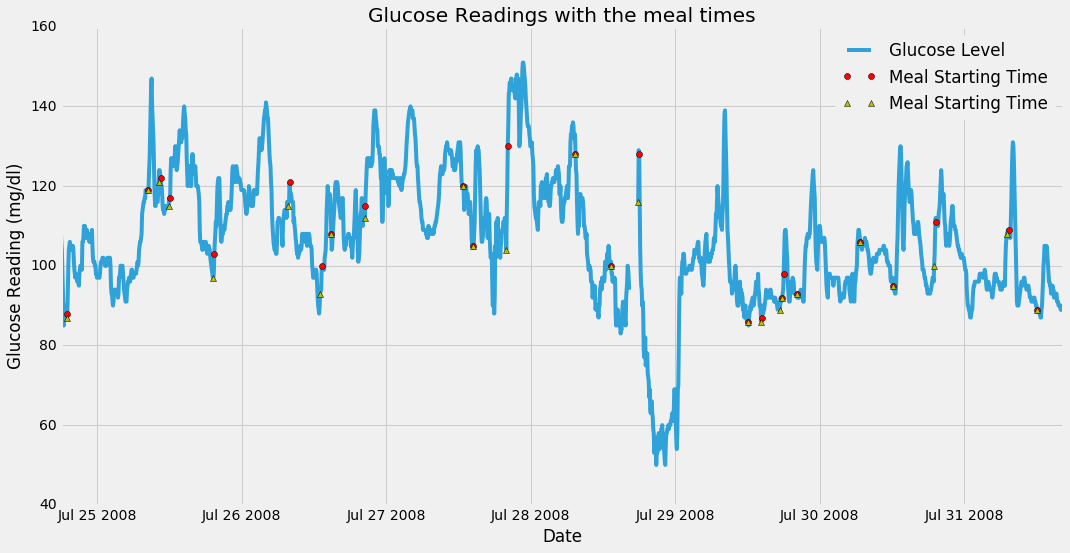

In [145]:
plt.figure(figsize=_FIG_SIZE)
plt.plot_date(df.Date, df['mg/dL'], '-', label="Glucose Level");
plt.plot_date(df4.Date, df4['mg/dL'], 'ro', label="Meal Starting Time")
plt.plot_date(df5.Date, df5['mg/dL'], 'y^', label="Meal Starting Time")
plt.xlabel('Date')
plt.ylabel('Glucose Reading (mg/dl)')
plt.legend(loc='upper right')
plt.title('Glucose Readings with the meal times');

In [146]:
#This cell is for the interactive plotting using bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models.markers import Asterisk
from bokeh.models import ColumnDataSource, DataRange1d, Plot, LinearAxis, Grid
from bokeh.models import HoverTool

# output to static HTML file
output_file("lines.html")


plot = figure(plot_width=1850, plot_height=900, title="Glucose Readings Interactive Plot",
              tools='pan,wheel_zoom,reset,box_zoom,save, undo', x_axis_type='datetime')

plot.line(df.Date, df['mg/dL'],  line_width=2, line_alpha=0.6)
plot.square(df.Date, df['mg/dL'], legend="Glucose Readings", fill_color=None, line_color="green")

source = ColumnDataSource(dict(x=df4.Date, y=df4['mg/dL']))

glyph_1 = Asterisk(x="x", y="y", line_color="#f0027f", fill_color=None, line_width=8)
plot.add_glyph(source, glyph_1)

adjusted_meal_times = ColumnDataSource(dict(x=df5.Date, y=df5['mg/dL']))

glyph_2 = Asterisk(x="x", y="y", line_color="#0404B4", fill_color=None, line_width=4)
plot.add_glyph(adjusted_meal_times, glyph_2)

# show the results
show(plot)

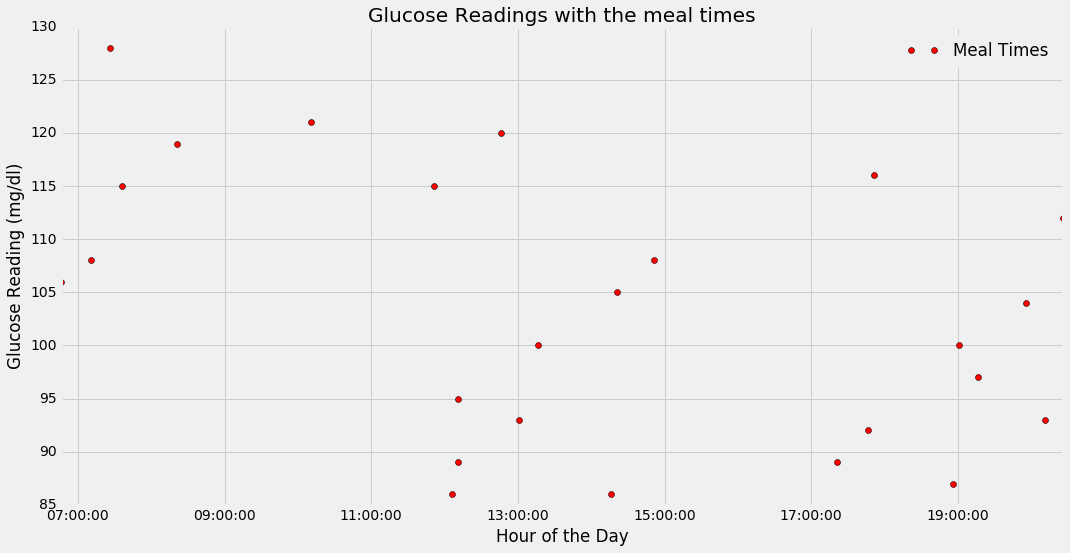

In [147]:
#Date and time manipulation: Plot all meal times in one day to observe what are the regular meal times.
#Plot for both df4, which represents the first recorded meal time, and df5 represents the meal times adjusted to lowest point
import matplotlib.dates as md
from datetime import datetime, time

df6 = pd.DataFrame(df5)

#-------------Extras & Not Needed for now
#To extract date and time from timestamp
# dt = datetime(df5.Date[4].year, df5.Date[4].month, df5.Date[4].day, df5.Date[4].hour, df5.Date[4].minute)
# print dt
# #for the date only, it is the following:
# dt = datetime.date(df5.Date[4])
# print dt
#-------------

#Below is to extract hours and minutes from Date-- Date and time manipulation but did not need to use in our case
#Date can be a timestamp or a string

#-------------Extras & Not Needed for now
# arr = []
# for i, elem in enumerate(df5.Date):
#     #temp = time(df5.Date[i].hour, df5.Date[i].minute)
#     #Below will put the hour and minute as a string
#     temp = "%s:%s" %(df5.Date[i].hour, df5.Date[i].minute) 
#     arr.append(temp)
#     date_object = datetime.strptime(temp, '%H:%M')
#     date_object = date_object.replace(year=2009)
#     print date_object
#----------       

#One slik way to use for loop differently with array
# df_length = len(df5)    
# arr = np.array([df5.Date[i].hour for i in xrange(df_length)])

#-------------Extras & Not Needed for now
# d1 = datetime.date(df6.Date[5])
# d2 = d1.replace(year=2009, month=5, day=25)
# print d2
#----------  
d = datetime.today()
for i in xrange(len(df6)):
    #dt = df6.Date[i].replace(year=2009, month=5, day=25)
    dt = df6.Date[i].replace(year=d.year, month=d.month, day=d.day)    
    df6.Date[i] = dt

plt.figure(figsize=_FIG_SIZE)
plt.plot_date(df6.Date, df6['mg/dL'], 'ro', label="Meal Times")
plt.xlabel('Hour of the Day')
plt.ylabel('Glucose Reading (mg/dl)')
plt.legend(loc='upper right')
plt.title('Glucose Readings with the meal times');


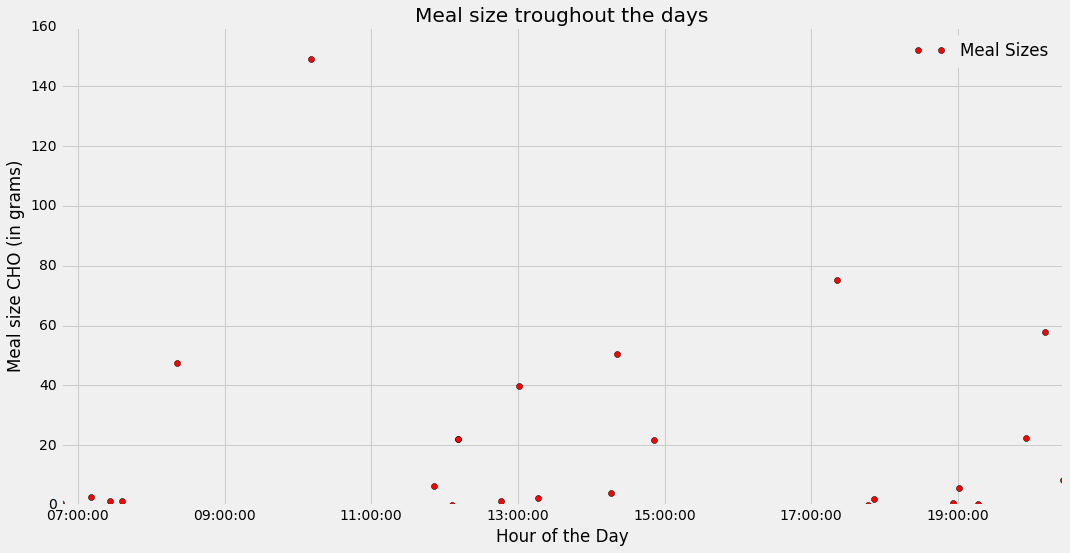

In [148]:
plt.figure(figsize=_FIG_SIZE)
plt.plot_date(df6.Date, df6['CHO (g)'], 'ro', label="Meal Sizes")
plt.xlabel('Hour of the Day')
plt.ylabel('Meal size CHO (in grams)')
plt.legend(loc='upper right')
plt.title('Meal size troughout the days');

In [155]:
#Count number of meals within
incr = 5
print "\nThis patient has a total of", df6['CHO (g)'].size, "meals of the following sizes:\n"
cho_max = df6['CHO (g)'].max()
#print cho_max
cho_range = [i for i in np.arange(incr, cho_max+incr, incr)]
#print cho_range

count = [0 for x in range(len(cho_range))]

cho_max = df6['CHO (g)'].max()

for item in df6['CHO (g)']:
    pos = bisect_left(cho_range, item)
    if pos == len(cho_range):
        print "This value", item, "is out of range"
    else:
        count[pos] += 1
#print count

for i, j in enumerate(cho_range):
    if i == 0:
        print "There are", count[i], "meals with CHO less than", cho_range[i], "grams"
    else:
        print "There are", count[i], "meals with CHO between", cho_range[i-1], "grams and", cho_range[i]
        




This patient has a total of 25 meals of the following sizes:

There are 12 meals with CHO less than 5.0 grams
There are 3 meals with CHO between 5.0 grams and 10.0
There are 0 meals with CHO between 10.0 grams and 15.0
There are 0 meals with CHO between 15.0 grams and 20.0
There are 4 meals with CHO between 20.0 grams and 25.0
There are 0 meals with CHO between 25.0 grams and 30.0
There are 0 meals with CHO between 30.0 grams and 35.0
There are 1 meals with CHO between 35.0 grams and 40.0
There are 0 meals with CHO between 40.0 grams and 45.0
There are 1 meals with CHO between 45.0 grams and 50.0
There are 1 meals with CHO between 50.0 grams and 55.0
There are 1 meals with CHO between 55.0 grams and 60.0
There are 0 meals with CHO between 60.0 grams and 65.0
There are 0 meals with CHO between 65.0 grams and 70.0
There are 0 meals with CHO between 70.0 grams and 75.0
There are 1 meals with CHO between 75.0 grams and 80.0
There are 0 meals with CHO between 80.0 grams and 85.0
There are 